In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

instant: record index
 dteday : date
season : season (1:springer, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : weather day is holiday or not (extracted from [Web Link])
weekday : day of the week
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including both casual and registered


In [3]:
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Li12u1jaRUGdjOAU6AhwzA_ae83a19eedae4f2d8cb34f381c1097e1_Capstone_Project_Resources/day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#string to date data

In [5]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bike_df['dteday'].dtypes

dtype('<M8[ns]')

In [7]:
#On a machine whose byte order is little endian, there is no difference between np.dtype('datetime64[ns]') and np.dtype('<M8[ns]'):

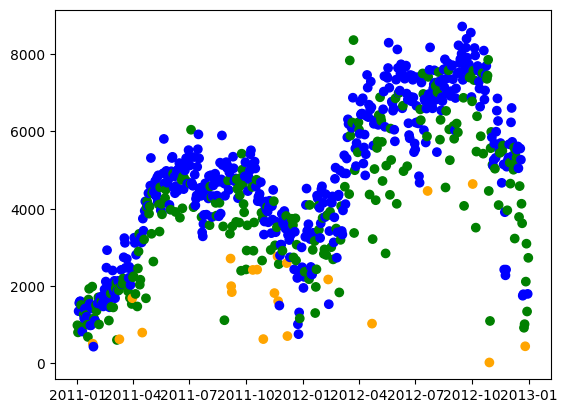

In [13]:
colors = {1: 'blue', 2: 'green', 3: 'orange', 4:'red'}
plt.scatter(bike_df['dteday'], bike_df['cnt'],
            c=bike_df['weathersit'].map(colors), label="Weather Condition")

###1: Clear, Few clouds, Partly cloudy, Partly cloudy

###2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

###3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

###4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [16]:
list1 = bike_df['weathersit'].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'sorted'

In [17]:
list1.sort()

In [18]:
list1

array([1, 2, 3])

In [22]:
for i in range(len(list1)):
  print(bike_df[bike_df['weathersit']==list1[i]]['cnt'].mean())

4876.7861771058315
4035.862348178138
1803.2857142857142


In [21]:
bike_df[bike_df['weathersit']==1]['cnt'].mean()

np.float64(4876.7861771058315)

In [23]:
bike_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


<Axes: >

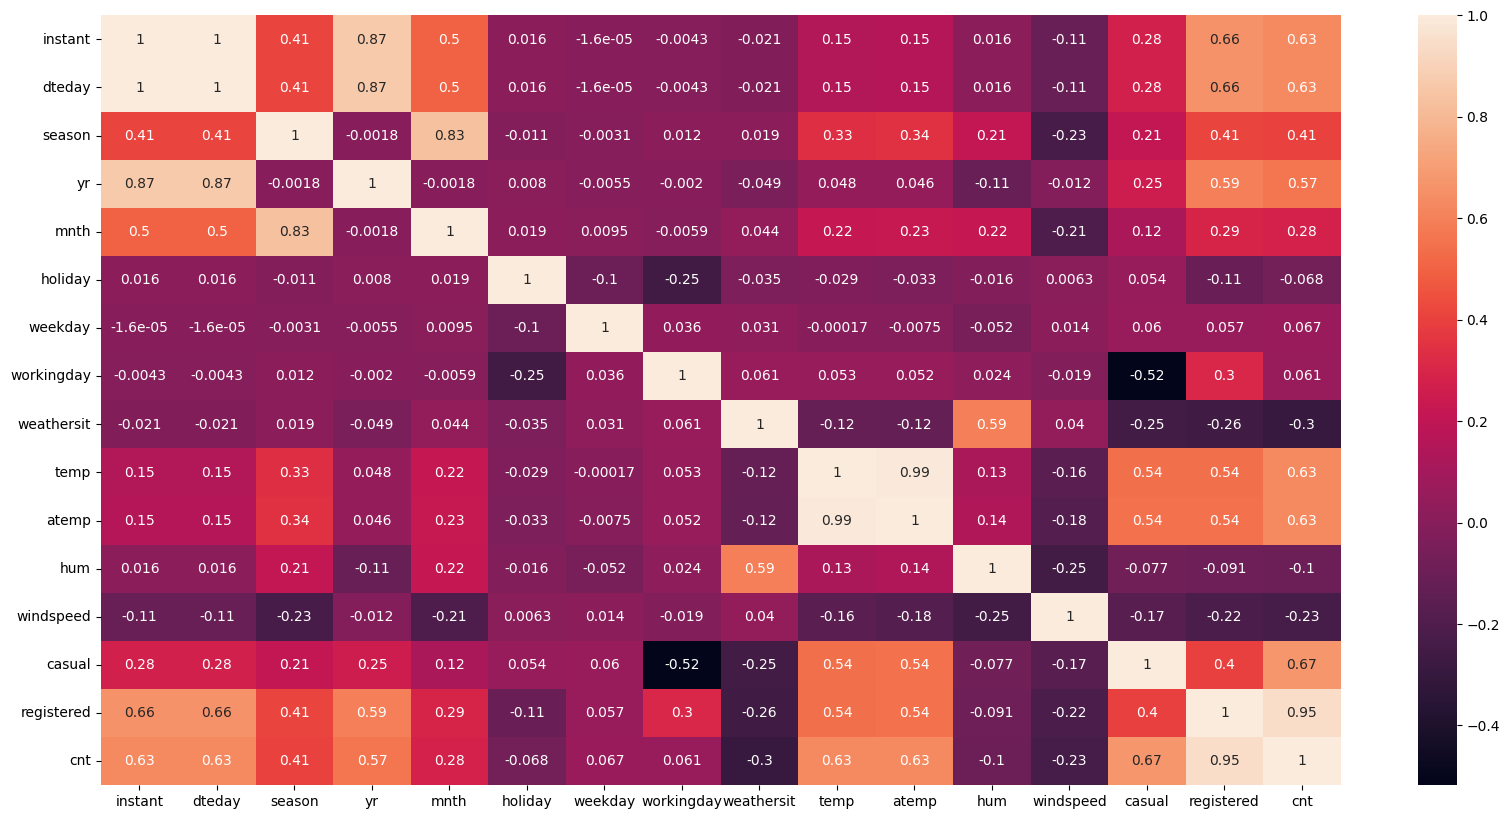

In [31]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(bike_df.corr(), annot=True)

In [32]:
correlation_matrix = bike_df.corr()
corr_unstacked = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
most_correlated_pairs = corr_unstacked.unstack().dropna().sort_values(ascending=False)
print(most_correlated_pairs.head(10))

dteday      instant       1.000000
atemp       temp          0.991702
cnt         registered    0.945517
yr          dteday        0.866025
            instant       0.866025
mnth        season        0.831440
cnt         casual        0.672804
registered  dteday        0.659623
            instant       0.659623
cnt         atemp         0.631066
dtype: float64


In [34]:
top_correlated_features = correlation_matrix['cnt'].drop('cnt').abs().sort_values(ascending=False).head(6).index.tolist()
print("Selected Features: ", top_correlated_features)

Selected Features:  ['registered', 'casual', 'atemp', 'instant', 'dteday', 'temp']


In [35]:
X = bike_df[top_correlated_features]
y = bike_df['cnt']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_train = X_train.select_dtypes(exclude=['datetime64'])
X_test = X_test.select_dtypes(exclude=['datetime64'])

In [42]:
print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (584, 5)
Test set: (147, 5)


In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 59.97
Mean Squared Error (MSE): 9348.57
Root Mean Squared Error (RMSE): 96.69
R² Score: 1.00


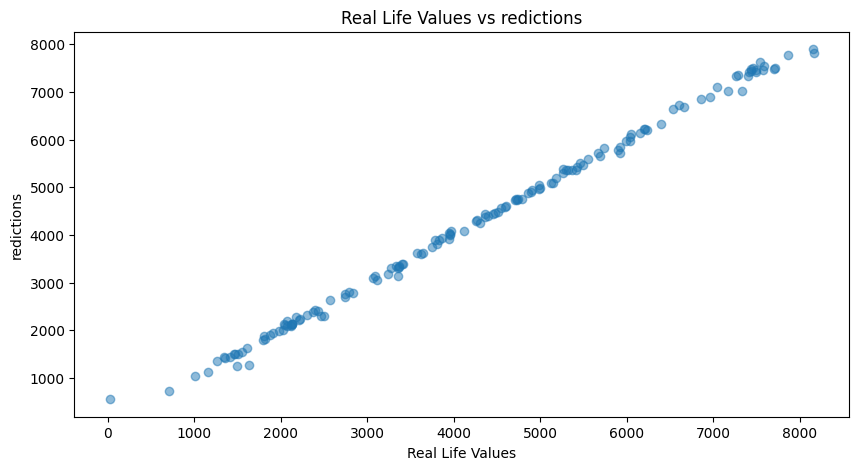

In [49]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Real Life Values")
plt.ylabel("redictions")
plt.title("Real Life Values vs redictions")
plt.show()


In [50]:
results = pd.DataFrame({'Real Life Values': y_test.values, 'Predictions': y_pred})
print(results.head(10))

   Real Life Values  Predictions
0              6606      6721.00
1              1550      1546.77
2              3747      3747.79
3              6041      6057.41
4              7538      7636.37
5              7264      7332.49
6              1605      1639.05
7              2209      2220.99
8              7499      7429.03
9              5743      5821.63
